## Sampling 700,000 

In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

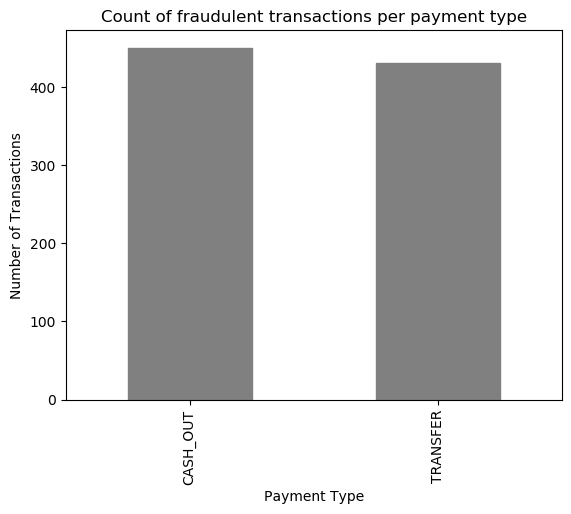

In [ ]:
import matplotlib.pyplot as plt

# filter the data to only include fraud transactions
fraud_df = df_sample[df_sample['isFraud'] == 1]

# group the fraud data by payment type and count the number of transactions in each group
fraud_counts = fraud_df.groupby('type').size()

# plot a bar chart to visualize the fraud counts by payment type
fraud_counts.plot(kind='bar',color='gray',edgecolor ="gray")

# set the chart title and axes labels
plt.title('Count of fraudulent transactions per payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')

# display the chart
plt.show()

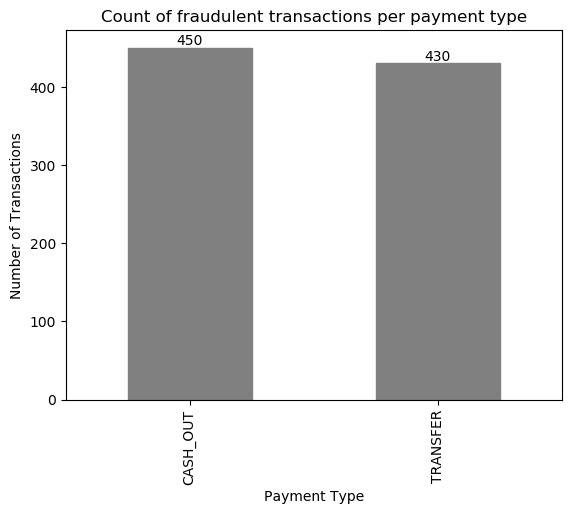

In [3]:
import matplotlib.pyplot as plt

# filter the data to only include fraud transactions
fraud_df = df_sample[df_sample['isFraud'] == 1]

# group the fraud data by payment type and count the number of transactions in each group
fraud_counts = fraud_df.groupby('type').size()

# plot a bar chart to visualize the fraud counts by payment type
ax = fraud_counts.plot(kind='bar', color='gray', edgecolor='gray')

# set the chart title and axes labels
plt.title('Count of fraudulent transactions per payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')

# display the count values over the top of each bar
for i, v in enumerate(fraud_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# display the chart
plt.show()

In [4]:
count_cash_out_fraud = len(df_sample[(df_sample['type'] == 'PAYMENT') & (df_sample['isFraud'] == 1)])
count_cash_out_fraud 

0

In [ ]:
count_cash_out_fraud = len(df_sample[(df_sample['type'] == 'TRANSFER') & (df_sample['isFraud'] == 1)])
count_cash_out_fraud 

In [ ]:
#Create New DataFrame with Count
new_df = df_sample["type"].value_counts().rename_axis('types_of_transaction').reset_index(name='counts')
new_df.head()

In [ ]:
#Set lables and values
my_labels = new_df.types_of_transaction
print(my_labels)
my_values = new_df.counts

In [ ]:
#Visualize the pie chart
fig=plt.figure(figsize=(4,4)) # Resize
wp= {'linewidth':0.5,'edgecolor':"black"}
ax=fig.add_axes([0,0,1,1]) # Add axis to the figure
ax.axis('equal')
explode=(0.1,0.1,0.1,0.1,0.1)
ax.pie(my_values, labels=my_labels, autopct='%1.2f%%',explode=explode,shadow=True,wedgeprops=wp)
font = {'fontname':'Comic Sans MS'} # Change font
# plt.title('Type of Transactions',fontsize=20,color='purple',**font,fontweight='bold')
plt.legend(['CASH_OUT', 'PAYMENT', 'CASH_IN','TRANSFER','DEBIT'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
# Define the colors for each pie
colors = ['#FFA07A', '#9FE2BF', '#FF7F50', '#6CB08B', '#6CB0AD']

# Visualize the pie chart
fig = plt.figure(figsize=(4,4)) # Resize
wp = {'linewidth':0.5, 'edgecolor':"black"}
ax = fig.add_axes([0,0,1,1]) # Add axis to the figure
ax.axis('equal')
explode = (0.1,0.1,0.1,0.1,0.1)
ax.pie(my_values, labels=my_labels, autopct='%1.2f%%', explode=explode,
       shadow=True, wedgeprops=wp, colors=colors)
font = {'fontname':'Comic Sans MS'} # Change font
# plt.title('Type of Transactions',fontsize=20,color='purple',**font,fontweight='bold')
plt.legend(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [ ]:
sns.scatterplot(data=df_sample, x="amount", y="newbalanceDest", hue="type")

In [ ]:
import pandas as pd

# create a dictionary of data types and variables
data_types = {'float': ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest'],
              'int': ['step', 'isFraud', 'isFlaggedFraud'],
              'object': ['type', 'nameDest', 'nameOrig']}

# create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(data_types, orient='index').T

# set the column names
df.columns = ['Float', 'Integer', 'Object']

# display the DataFrame
df

In [ ]:
df_sample.dtypes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of the variable names to plot
vars_to_plot = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# create a boxplot for each variable side-by-side
fig, axs = plt.subplots(ncols=len(vars_to_plot), figsize=(20, 5))
for i, var in enumerate(vars_to_plot):
    sns.boxplot(x=df_sample[var], ax=axs[i], color='skyblue')
    axs[i].set_xlabel(var, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd

# create a pairplot
sns.pairplot(df_sample)

In [2]:
features=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

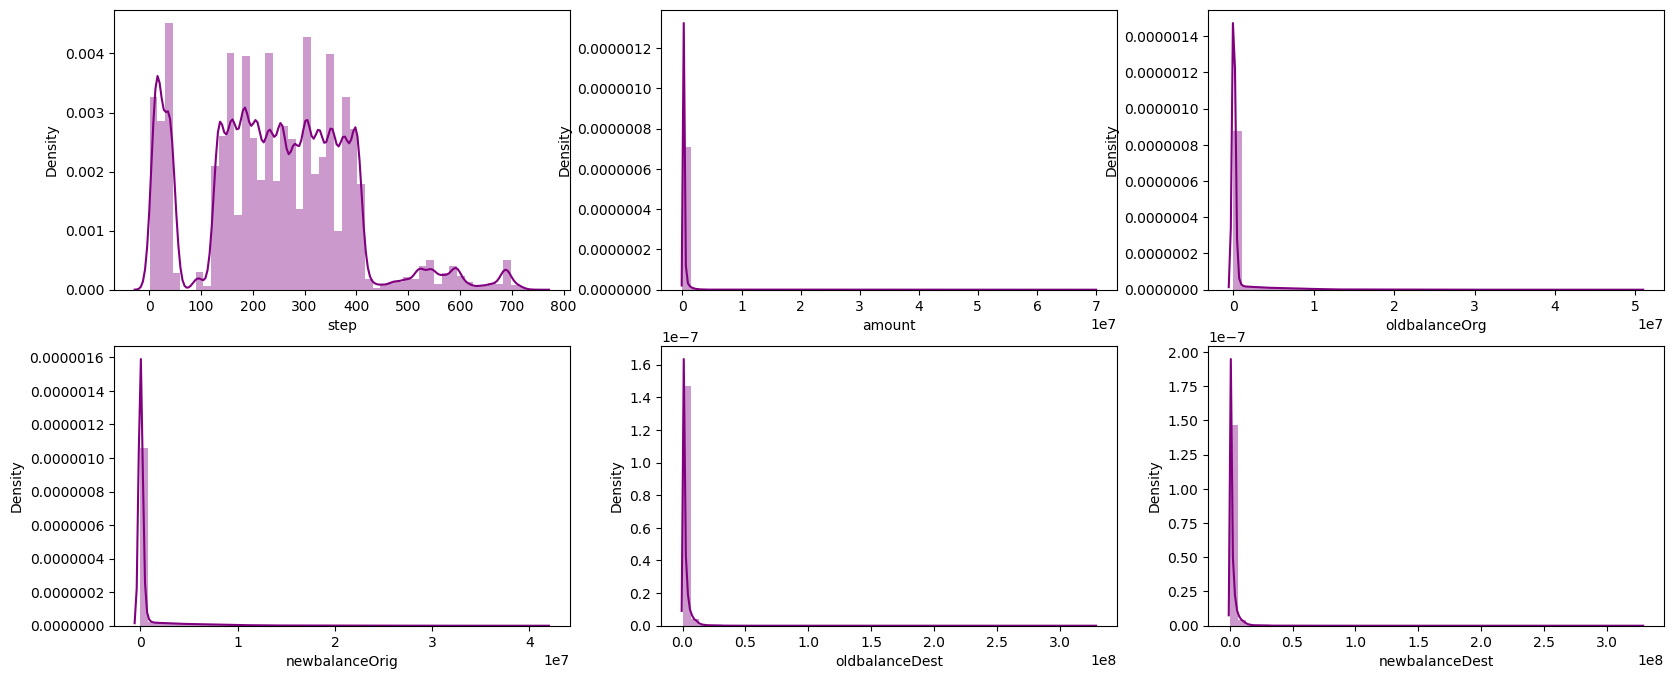

In [4]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
    plt.subplot(2,3,features.index(feature)+1)
    sns.distplot(df_sample[feature],hist=True,color='purple')
plt.show()

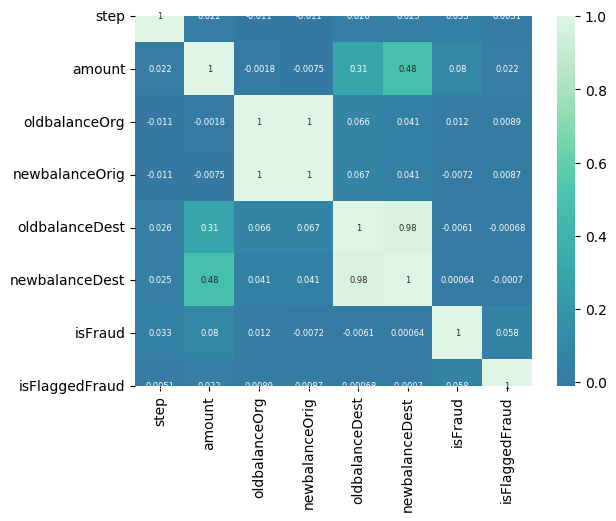

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_sample.corr()

# Plot the correlation matrix as a heatmap with smaller font size and bigger figure size
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True, annot_kws={'fontsize': 6})

# Show the plot
plt.show()

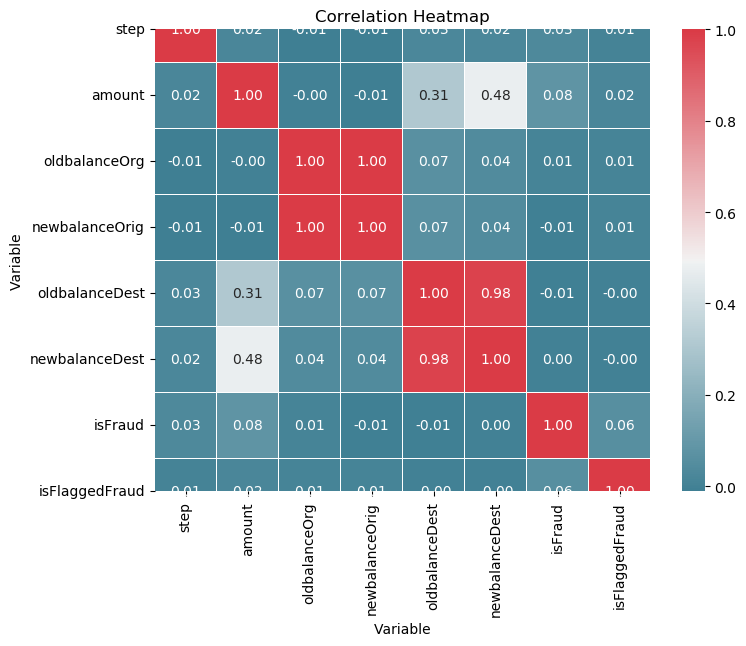

In [18]:
# Calculate the correlation matrix
corr_matrix = df_sample.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, ax=ax)

# Set the chart title and axes labels
plt.title('Correlation Heatmap')
plt.xlabel('Variable')
plt.ylabel('Variable')

# Show the plot
plt.show()

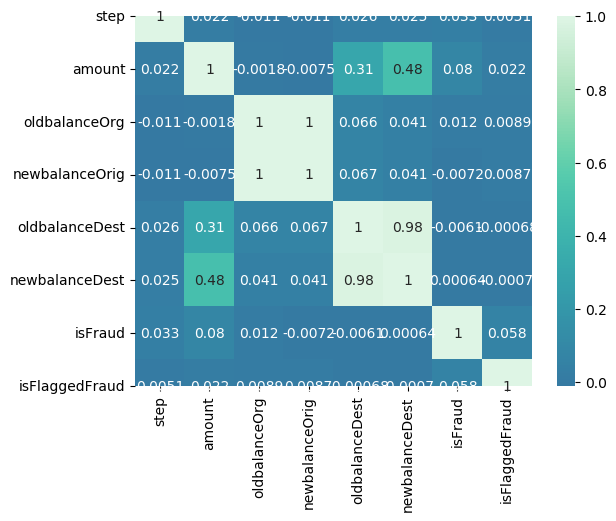

In [14]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df_sample.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True)

In [ ]:
df_sample.dtypes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pywedge as pw
import bqplot

In [ ]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of label Encoder
le = LabelEncoder()

# Using .fit_transform function to fit label and return encoded label
label = le.fit_transform(df['type'])

# removing the column 'type' from df as it is of no use now.
df.drop("type", axis=1, inplace=True)

# Appending the array to our dataFrame with column name 'type'
df["type"] = label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

In [ ]:
import random
random.seed (20)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.14, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.25, 'oldbalanceDest': 0.22, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train.loc[X_train[col_name] > np.percentile(X_train[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

In [ ]:
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\trainNEW2.csv", index=False)
X_test.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\testNEW2.csv", index=False)

## Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier (n_estimators=150,random_state=18)
rfc.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt

# Get the feature importance values
importance_vals = rfc.feature_importances_

# Sort importance values
indices = np.argsort(importance_vals[::-1])

# Plot the feature importance of the forest
plt.figure()
plt.title("Random Forest Impurity based feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices][::-1])

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

## Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your feature matrix and y_train is your target variable
# Standardize the feature matrix
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Initialize the RidgeCV model
model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Fit the model to the standardized feature matrix and target variable
model.fit(X_train_std, y_train)

# Print the best alpha value
print("Best alpha:", model.alpha_)

# Print the coefficients of the selected features along with their names
for feature_name, coefficient in zip(X_train.columns, model.coef_):
    print(feature_name, "coefficient:", coefficient)

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of feature coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(X_train.columns, model.coef_)

# Set chart title and axis labels
ax.set_title("Ridge Regression Coefficients", fontsize=16)
ax.set_xlabel("Feature", fontsize=14)
ax.set_ylabel("Coefficient", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the chart
plt.show()